#Code used to analyse rediscovery results
This notebook was made on Google Colab ([link to notebook](https://colab.research.google.com/drive/1X1qa9ZKjPBeWFzfn6mc55hrQgrp_oLoG)). If you are running on your local machine remove the cells related to data retrieval and RDKit installation, and change the paths to the files as needed.

#Install RDKit, get files, and imports

In [0]:
# Install RDKit. Takes 2-3 minutes
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit

In [0]:
%%bash
rm data.zip
wget https://github.com/jensengroup/GA_ChemSpace_exploration/blob/master/data.zip?raw=true
mv data.zip?raw=true data.zip
unzip data.zip

rm initial_populations.zip?raw=true
wget https://github.com/jensengroup/GA_ChemSpace_exploration/blob/master/initial_populations.zip?raw=true
mv initial_populations.zip?raw=true initial_populations.zip
unzip initial_populations.zip

In [0]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

from rdkit import Chem
from rdkit.Chem import AllChem
from collections import defaultdict
from rdkit.Chem import rdFMCS
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit import DataStructs

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd

#Figure 4

In [0]:
high_score_list_graph = pickle.load(open('data/celecoxib_rediscovery_graph.p', "rb"))
high_score_list_string = pickle.load(open('data/celecoxib_rediscovery_string.p', "rb"))
celecoxib_score_list = high_score_list_graph + high_score_list_string

high_score_list_graph = pickle.load(open('data/troglitazone_rediscovery_graph.p', "rb"))
high_score_list_string = pickle.load(open('data/troglitazone_rediscovery_string.p', "rb"))
troglitazone_score_list = high_score_list_graph + high_score_list_string

high_score_list_graph = pickle.load(open('data/tiotixene_rediscovery_graph.p', "rb"))
high_score_list_string = pickle.load(open('data/tiotixene_rediscovery_string.p', "rb"))
tiotixene_score_list = high_score_list_graph + high_score_list_string

In [0]:
def median(found):
  if found:
    return ' ('+str(int(np.median(found)))+')'
  else:
    return ''

We tried runs with and without elitist selection (referred to as pruning in the code). With works much better so that is the only data we analyse, which is why we are skipping some chunks in the lists.

Text(300, 0.4, 'Success: 0.0')

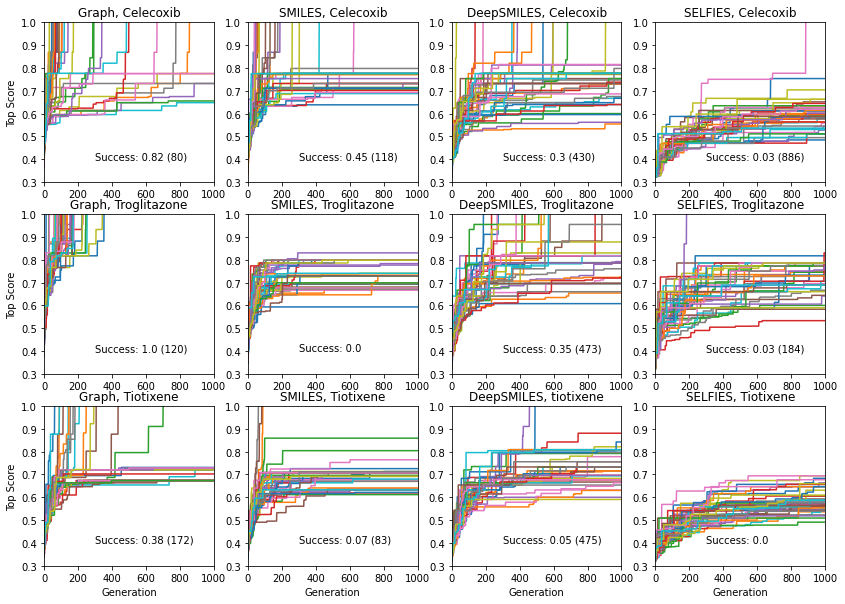

In [8]:
fig = plt.figure(figsize=(14, 10))
x = 300
y = 0.4

tries = len(celecoxib_score_list)//(4*2)

plt.subplot(3, 4, 1)
for i, high_score in enumerate(celecoxib_score_list[0:tries]):
  plt.plot(range(len(high_score)),[x for (x,y) in high_score],label=str(i))
plt.title('Graph, Celecoxib')
plt.ylabel('Top Score')
#plt.legend()
plt.axis((0,1000,0.3,1.0))
found = [len(x) for x in celecoxib_score_list[0*tries:1*tries] if len(x) != 1000]
plt.text(x, y, 'Success: '+str(round(len(found)/40,2))+median(found))

plt.subplot(3, 4, 2)
for i, high_score in enumerate(celecoxib_score_list[2*tries:3*tries]):
  plt.plot(range(len(high_score)),[x for (x,y) in high_score],label=str(i))
plt.title('SMILES, Celecoxib')
#plt.legend()
plt.axis((0,1000,0.3,1.0))
found = [len(x) for x in celecoxib_score_list[2*tries:3*tries] if len(x) != 1000]
plt.text(x, y, 'Success: '+str(round(len(found)/40,2))+median(found))
  
plt.subplot(3, 4, 3)
for i, high_score in enumerate(celecoxib_score_list[4*tries:5*tries]):
  plt.plot(range(len(high_score)),[x for (x,y) in high_score],label=str(i))
plt.title('DeepSMILES, Celecoxib')
#plt.legend()
plt.axis((0,1000,0.3,1.0))
found = [len(x) for x in celecoxib_score_list[4*tries:5*tries] if len(x) != 1000]
plt.text(x, y, 'Success: '+str(round(len(found)/40,2))+median(found))


plt.subplot(3, 4, 4)
for i, high_score in enumerate(celecoxib_score_list[6*tries:7*tries]):
  plt.plot(range(len(high_score)),[x for (x,y) in high_score],label=str(i))
plt.title('SELFIES, Celecoxib')
#plt.legend()
plt.axis((0,1000,0.3,1.0))
found = [len(x) for x in celecoxib_score_list[6*tries:7*tries] if len(x) != 1000]
plt.text(x, y, 'Success: '+str(round(len(found)/40,2))+median(found))
  
plt.subplot(3, 4, 5)
for i, high_score in enumerate(troglitazone_score_list[0:tries]):
  plt.plot(range(len(high_score)),[x for (x,y) in high_score],label=str(i))
plt.title('Graph, Troglitazone')
plt.ylabel('Top Score')
#plt.legend()
plt.axis((0,1000,0.3,1.0))
found = [len(x) for x in troglitazone_score_list[0*tries:1*tries] if len(x) != 1000]
plt.text(x, y, 'Success: '+str(round(len(found)/40,2))+median(found))

plt.subplot(3, 4, 6)
for i, high_score in enumerate(troglitazone_score_list[2*tries:3*tries]):
  plt.plot(range(len(high_score)),[x for (x,y) in high_score],label=str(i))
plt.title('SMILES, Troglitazone')
#plt.legend()
plt.axis((0,1000,0.3,1.0))
found = [len(x) for x in troglitazone_score_list[2*tries:3*tries] if len(x) != 1000]
plt.text(x, y, 'Success: '+str(round(len(found)/40,2))+median(found))
  
plt.subplot(3, 4, 7)
for i, high_score in enumerate(troglitazone_score_list[4*tries:5*tries]):
  plt.plot(range(len(high_score)),[x for (x,y) in high_score],label=str(i))
plt.title('DeepSMILES, Troglitazone')
#plt.legend()
plt.axis((0,1000,0.3,1.0))
found = [len(x) for x in troglitazone_score_list[4*tries:5*tries] if len(x) != 1000]
plt.text(x, y, 'Success: '+str(round(len(found)/40,2))+median(found))

plt.subplot(3, 4, 8)
for i, high_score in enumerate(troglitazone_score_list[6*tries:7*tries]):
  plt.plot(range(len(high_score)),[x for (x,y) in high_score],label=str(i))
plt.title('SELFIES, Troglitazone')
#plt.legend()
plt.axis((0,1000,0.3,1.0))
found = [len(x) for x in troglitazone_score_list[6*tries:7*tries] if len(x) != 1000]
plt.text(x, y, 'Success: '+str(round(len(found)/40,2))+median(found))
  
plt.subplot(3, 4, 9)
for i, high_score in enumerate(tiotixene_score_list[0:tries]):
  plt.plot(range(len(high_score)),[x for (x,y) in high_score],label=str(i))
plt.title('Graph, Tiotixene')
plt.xlabel('Generation')
plt.ylabel('Top Score')
#plt.legend()
plt.axis((0,1000,0.3,1.0))
found = [len(x) for x in tiotixene_score_list[0*tries:1*tries] if len(x) != 1000]
plt.text(x, y, 'Success: '+str(round(len(found)/40,2))+median(found))

plt.subplot(3, 4, 10)
for i, high_score in enumerate(tiotixene_score_list[2*tries:3*tries]):
  plt.plot(range(len(high_score)),[x for (x,y) in high_score],label=str(i))
plt.title('SMILES, Tiotixene')
plt.xlabel('Generation')
#plt.legend()
plt.axis((0,1000,0.3,1.0))
found = [len(x) for x in tiotixene_score_list[2*tries:3*tries] if len(x) != 1000]
plt.text(x, y, 'Success: '+str(round(len(found)/40,2))+median(found))
  
plt.subplot(3, 4, 11)
for i, high_score in enumerate(tiotixene_score_list[4*tries:5*tries]):
  plt.plot(range(len(high_score)),[x for (x,y) in high_score],label=str(i))
plt.title('DeepSMILES, tiotixene')
plt.xlabel('Generation')
#plt.legend()
plt.axis((0,1000,0.3,1.0))
found = [len(x) for x in tiotixene_score_list[4*tries:5*tries] if len(x) != 1000]
plt.text(x, y, 'Success: '+str(round(len(found)/40,2))+median(found))


plt.subplot(3, 4, 12)
for i, high_score in enumerate(tiotixene_score_list[6*tries:7*tries]):
  plt.plot(range(len(high_score)),[x for (x,y) in high_score],label=str(i))
plt.title('SELFIES, Tiotixene')
plt.xlabel('Generation')
#plt.legend()
plt.axis((0,1000,0.3,1.0))
found = [len(x) for x in tiotixene_score_list[6*tries:7*tries] if len(x) != 1000]
plt.text(x, y, 'Success: '+str(round(len(found)/40,2))+median(found))
  

In [0]:
fig.tight_layout()
fig.savefig('rediscovery_guacamol.png')

##Number of searches needed for >99% certainty

In [10]:
from math import log, ceil
p = 15/40
print(p)
N = ceil(log(0.01)/log(1-p))
print(N)


0.375
10


#Figure 6

Text(300, 0.4, 'Success: 0.25 (295)')

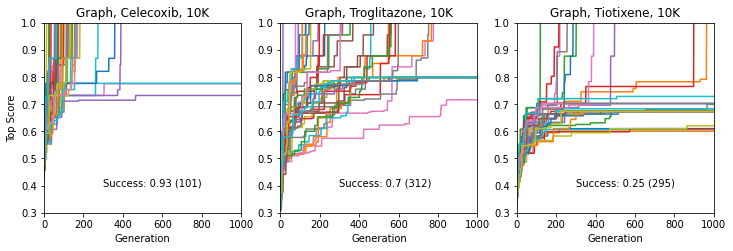

In [11]:
x = 300
y = 0.4

fig = plt.figure(figsize=(12, 3.5))

plt.subplot(1, 3, 1)
high_score_list = pickle.load(open('data/celecoxib_rediscovery_10K.p', "rb"))
for i, high_score in enumerate(high_score_list):
  plt.plot(range(len(high_score)),[x for (x,y) in high_score],label=str(i))
plt.title('Graph, Celecoxib, 10K')
plt.xlabel('Generation')
plt.ylabel('Top Score')
#plt.legend()
plt.axis((0,1000,0.3,1.0))
found = [len(x) for x in high_score_list if len(x) != 1000]
plt.text(x, y, 'Success: '+str(round(len(found)/40,2))+median(found))

plt.subplot(1, 3, 2)
high_score_list = pickle.load(open('data/troglitazone_rediscovery_10K.p', "rb"))
for i, high_score in enumerate(high_score_list):
  plt.plot(range(len(high_score)),[x for (x,y) in high_score],label=str(i))
plt.title('Graph, Troglitazone, 10K')
plt.xlabel('Generation')
#plt.ylabel('Top Score')
#plt.legend()
plt.axis((0,1000,0.3,1.0))
found = [len(x) for x in high_score_list if len(x) != 1000]
plt.text(x, y, 'Success: '+str(round(len(found)/40,2))+median(found))


plt.subplot(1, 3, 3)
high_score_list = pickle.load(open('data/tiotixene_rediscovery_10K.p', "rb"))
for i, high_score in enumerate(high_score_list):
  plt.plot(range(len(high_score)),[x for (x,y) in high_score],label=str(i))
plt.title('Graph, Tiotixene, 10K')
plt.xlabel('Generation')
#plt.ylabel('Top Score')
#plt.legend()
plt.axis((0,1000,0.3,1.0))
found = [len(x) for x in high_score_list if len(x) != 1000]
plt.text(x, y, 'Success: '+str(round(len(found)/40,2))+median(found))




In [0]:
fig.tight_layout()
fig.savefig('rediscovery_10K.png')

##Number of searches needed for >99% certainty

In [13]:
high_score_list = pickle.load(open('data/tiotixene_rediscovery_10K.p', "rb"))
high_score_list = tiotixene_score_list[0:tries]
found = [len(x) for x in high_score_list if len(x) != 1000]
p = len(found)/40
print(p)
N = ceil(log(0.01)/log(1-p))
print(N*100_000)

0.375
1000000


In [14]:
found = [len(x) for x in high_score_list if len(x) <= 500]
p = len(found)/40
print(p)
N = ceil(log(0.01)/log(1-p))
print(N*50_000)

0.35
550000


In [15]:

p = len(found)/40
print(p)
N = ceil(log(0.01)/log(1-p))
print(N*100_000)

0.35
1100000


#Figure 5 and Table S1: SMILES analyses

## Celecoxib smiles analysis

In [0]:
initial_population = []
with open('initial_populations/Celecoxib_guacamol.smi','r') as file:
  for smiles in file:
    smiles = smiles.replace('\n', '')
    mol = Chem.MolFromSmiles(smiles)
    Chem.Kekulize(mol, clearAromaticFlags=True)
    smiles = Chem.MolToSmiles(mol, isomericSmiles=False)
    initial_population.append(smiles)


Show the SMILES found for the successful searches

Most look very similar to each other, indicating that they derive from common or similar molecule in initial population

In [17]:
for i,x in enumerate(celecoxib_score_list[2*tries:3*tries]):
  if len(x) != 1000: print(i,len(x),x[-1][1])

1 132 NS(=O)(=O)C1=CC=C(N2-N=C(C(F)(F)F)C=C2C/2=CC=C(C)C=C2)C=C1
4 190 NS(=O)(=O)C1=CC=C(N2N=C(C(F)(F)F)C=C(C3=CC=C(C)C=C3)2)[C@H]=C1
5 57 NS(=O)(=O)C1=[C@H]C=C(N2N=C(C(F)(F)F)C=C2C2=CC=C(C)C=C2)C=C1
6 625 NS(=O)(=O)C1=CC=C(N2N=C(C(F)(F)F)C=C2C2=CC=C(C)C=C2)[C@@H]=C1
7 177 NS(=O)(=O)C1=CC=C(N2N=C(C(F)(F)F)C=C2C2=CC=C(C)C=C2)C=C1
9 421 CC1=CC=C(N2N=C(C(F)(F)F)C=C2C2=CC=C(S(N)(=O)=O)C=C2)C=C1
11 49 NS(=O)(=O)C1=CC=C(N2N=C(C(F)(F)F)C=C2C2=[C@@H]C=C(C)C=C2)C=C1
13 47 NS(=O)(=O)C1=CC=C(N2N=C(C(F)(F)F)C=C2C2=CC=C(C)C=C2)C=C1
18 304 N1=C(C(F)(F)F)[C@H]=C(C2=CC=C(S(N)(=O)=O)C=C2)N1C1=CC=C(C)C=C1
20 66 NS(=O)(=O)C1=CC=C(N2N=C(C(F)(F)F)C=C2C2=CC=C(C)C=C2)[C@H]=C1
21 63 NS(=O)(=O)C1=CC=C(N2N=C(C(F)(F)F)C=C2C2=CC=C(C)C=C2)C=C1
24 47 NS(=O)(=O)\\C1=C[C@@H]=C(N2N=C(C(F)(F)F)C=C2C2=CC=C(C)C=C2)C=C1
25 161 NS(=O)(=O)C1=CC=C(N2N=C(C(F)(F)F)C=C(C3=CC=C(C)C=C3)2)C=C1
27 132 NS(=O)(=O)C1=[C@H]C=C(N2N=C(C(F)(F)F)C=C2C2=CC=C(C)C=C2)C=C1
28 262 NS(=O)(=O)C1=CC=C(N2N=C(C(F)(F)F)C=C(C3=CC=C(C)C=C3)2)C=C1
35 10

The first string is fairly representative.

Find the 15 most closely related strings to that one in the initial population.

In [18]:
import difflib
target = 'NS(=O)(=O)C1=CC=C(N2-N=C(C(F)(F)F)C=C2C/2=CC=C(C)C=C2)C=C1'
print(target, Chem.MolToSmiles(Chem.MolFromSmiles(target)))
difflib.get_close_matches(target, initial_population,15)

NS(=O)(=O)C1=CC=C(N2-N=C(C(F)(F)F)C=C2C/2=CC=C(C)C=C2)C=C1 Cc1ccc(-c2cc(C(F)(F)F)nn2-c2ccc(S(N)(=O)=O)cc2)cc1


['NS(=O)(=O)C1=CC=C(NNC(=O)C2=CC=CC=C2)C=C1',
 'NS(=O)(=O)C1=CC=C(NC(=O)CC2=CC=CC=C2)C=C1',
 'NS(=O)(=O)C1=CC=C(NN=CC2=CC=CC=C2Br)C=C1',
 'NS(=O)(=O)C1=CC=C(NC(=S)NC2=CC=CC=C2)C=C1',
 'NS(=O)(=O)C1=CC=C(NC(=O)NC2=CC=CC=C2)C=C1',
 'NS(=O)(=O)C1=CC=C(NC(=O)CC2=CC=NC=C2)C=C1',
 'NS(=O)(=O)C1=CC=C(CNC(=O)C2=CC=CC=C2)C=C1',
 'NS(=O)(=O)C1=CC=C(C(=O)NCC2=CC=CC=C2)C=C1',
 'NS(=O)(=O)C1=CC=C(C(=O)CSC2=CC=CC=C2)C=C1',
 'NS(=O)(=O)C1=CC=C(CN=CC2=CC=CC=C2O)C=C1',
 'NS(=O)(=O)C1=CC=C(CN=CC2=CC=CC=C2Cl)C=C1',
 'NS(=O)(=O)C1=CC=C(CNC(=O)C2=CC=NC=C2)C=C1',
 'NS(=O)(=O)C1=CC=C(C(=O)NCC2=CC=NC=C2)C=C1',
 'CCS(=O)(=O)C1=CC=C(CC(=O)NC2=CC=C(NCCC3=CC=C(C(F)(F)F)C=C3)C(Cl)=C2)C=C1',
 'COC1=CC=C(N2N=C(C(F)(F)F)C3=C2C(=O)N(C2=CC=C(C4(NC(C)=O)CC4)C=C2)CC3)C=C1']

There are 13 different molecules in the initial population with the right syntax. This explains why celecoxib is to easy to find with SMILES.

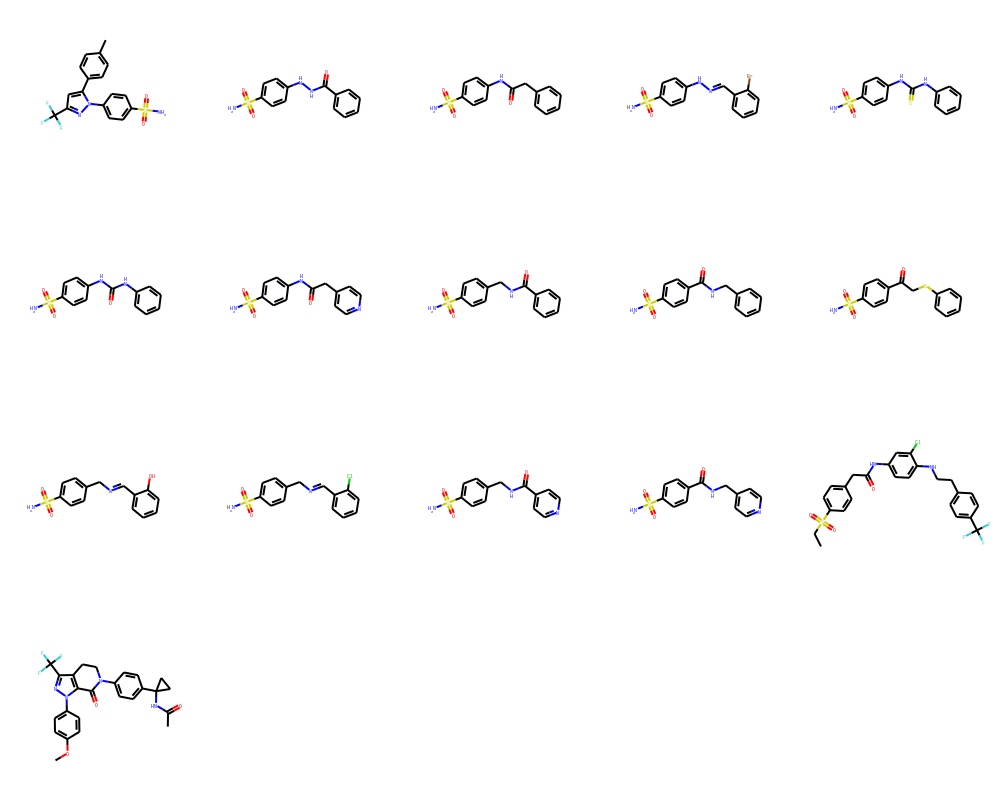

In [19]:
mols = [Chem.MolFromSmiles(target)] + [Chem.MolFromSmiles(x) for x in difflib.get_close_matches(target, initial_population,15)]
Draw.MolsToGridImage(mols,molsPerRow=5,legends=None,subImgSize=(200,200))

## Troglitazone SMILES analysis

In [0]:
initial_population = []
with open('initial_populations/Troglitazone_guacamol.smi','r') as file:
  for smiles in file:
    smiles = smiles.replace('\n', '')
    mol = Chem.MolFromSmiles(smiles)
    Chem.Kekulize(mol, clearAromaticFlags=True)
    smiles = Chem.MolToSmiles(mol, isomericSmiles=False)
    initial_population.append(smiles)

None of the runs succeed, but if we look at the scores we see that the highest score (0.83) is found only once, while the second highest score (0.797979797979798) is found quite often. Let's analyse that one further.

In [21]:
for i,x in enumerate(troglitazone_score_list[2*tries:3*tries]): 
  print(x[-1][0],x[-1][1])

0.5934065934065934 CC1(COC2=CC=C(CC3S/C(=O)NC3=O)C=C2)CCO1
0.6699029126213593 C1=[C@H]C(C2=C(O)C(C)=C(C)C3=C2CCC(COC)(C)O3)=CC(C[C@@H]2SC(=O)NC2=O)=C1
0.6699029126213593 C-COC1=CC=C(CC2SC(=O)NOC3=C(C)C(C)=C(O)C(C)=C3\CCNC2=O)C=C1
0.6796116504854369 CC1=C(COC2=CC=C(C[C@H]3SC(=O)NC3=O)C=C2)N=C(C)C2=C1CCC(CC)(C)O2
0.797979797979798 CC1=C(C)C2=C(CCC(C)(C[O@]C)O2)C(C-OC2=CC=C(C[C@H]3SC(=O)NC3=O)C=C2)=C1O
0.797979797979798 C1=C(-OCC2=C(O)C(C)=C(C)C3=C2CCC(COC)(C)O3)C=CC(C[C@@H]2SC(=O)NC2=O)=C1
0.7291666666666666 CC1(COC2=CC=C(CC3SC(=O)NC3=O)C=[C@@H]2)OC(C)=C(C)C(C)=C(O)CC1
0.6761904761904762 OC1=C(COC2=CC=C(CC3SC(=O)NC3=O)C=C2)C=C2OC(C)(C(\O\C))CCC2=C1C
0.797979797979798 CC1=C(O)C(C)=C(COC2=CC=C(C[C@@H]3SC(=O)NC3=O)C=C2)C2=C1CCC(COC)(C)O2
0.6923076923076923 CC1=C(C/OC2=CC=C(C[C@H]3SC(=O)NC3=O)C=C2)C=C(C)C2=C1/CCC(COO)(C)O2
0.7291666666666666 CC1=C(O)C(C)=C(C)CCC(C)(\COC2=CC=C(CC3SC(=O)NC3=O)C=C2)O-1
0.7291666666666666 O1C(C)(COC2=CC=C(CC3SC(=O)NC3=O)[C@@H]=C2)CCC(C)=C(C)C(C)=C1O
0.7979797979

SMILES strings start with ”CC1=..” and end with ”..C1O”, or vice versa




In [22]:
top_common_score = []
for i,x in enumerate(troglitazone_score_list[2*tries:3*tries]):
  if x[-1][0] == 0.797979797979798: 
    print(x[-1][1])
    top_common_score.append(Chem.MolFromSmiles(x[-1][1]))

CC1=C(C)C2=C(CCC(C)(C[O@]C)O2)C(C-OC2=CC=C(C[C@H]3SC(=O)NC3=O)C=C2)=C1O
C1=C(-OCC2=C(O)C(C)=C(C)C3=C2CCC(COC)(C)O3)C=CC(C[C@@H]2SC(=O)NC2=O)=C1
CC1=C(O)C(C)=C(COC2=CC=C(C[C@@H]3SC(=O)NC3=O)C=C2)C2=C1CCC(COC)(C)O2
OC1=C(COC2=CC=C(C[C@H]3SC(=O)NC3=O)C=C2)C(C)=C2OC(C)(COC)CCC2=C1C
CC1=C(COC2=CC=C(CC3SC(=O)NC3=O)C=C2)C2=C(CCC(COC)(C)O2)C(C)=C1O
OC1=C(C)C(C)=C2OC(COC)(C)C-CC2=C(COC2=CC=C(C[C@H]3SC(=O)NC3=O)C=C2)\1
CC1=C(C)C2=C(/CCC(C[O]C)(C)O2)C(COC2=CC=C(CC3SC(=O)NC3=O)C=C2)=C1O
CC1=C(C\OC2=CC=C(C[C@H]3SC(=O)NC3=O)C=C2)C2=C(CCC(C)(COC)O2)C(C)=C1O
CC1=C(COC2=CC=C(CC3SC(=O)NC3=O)C=C2)C2=C(CCC(C)(COC)O2)C(C)=C1O
CC1=C(COC2=CC=C(C[C@H]3SC(=O)NC3=O)C=C2)C2=C(CCC(C)(COC)O2)C(C)=C1O
[C@@H]1=C(C[C@H]2SC(=O)NC2=O)C=[C@H]C(OCC\2=C(O)C(C)=C(C)C3=C2CCC(C)(\COC)O3)=[C@H]1
CC1=C(C)C2=C(CCC(C)(CO\O)O2)C(C)=C1COC1=CC=C(C[C@@H]2SC(=O)NC2=O)C=C1
CC1=C(C)C2=C(CCC(C)(COO)O2)C(C)=C(COC2=CC=C(CC3SC(=O)NC3=O)C=C2)1
OC1=C(-COC2=CC=C(CC3SC(=O)NC3=O)C=C2)C(C)=C2OC(COC)(C)CCC2=C1C
CC1=C(C)C2=C(CCC(C)(COC)O2)C(COC2=C

All have the chromane moiety, but the main substituent is in the wrong positions.

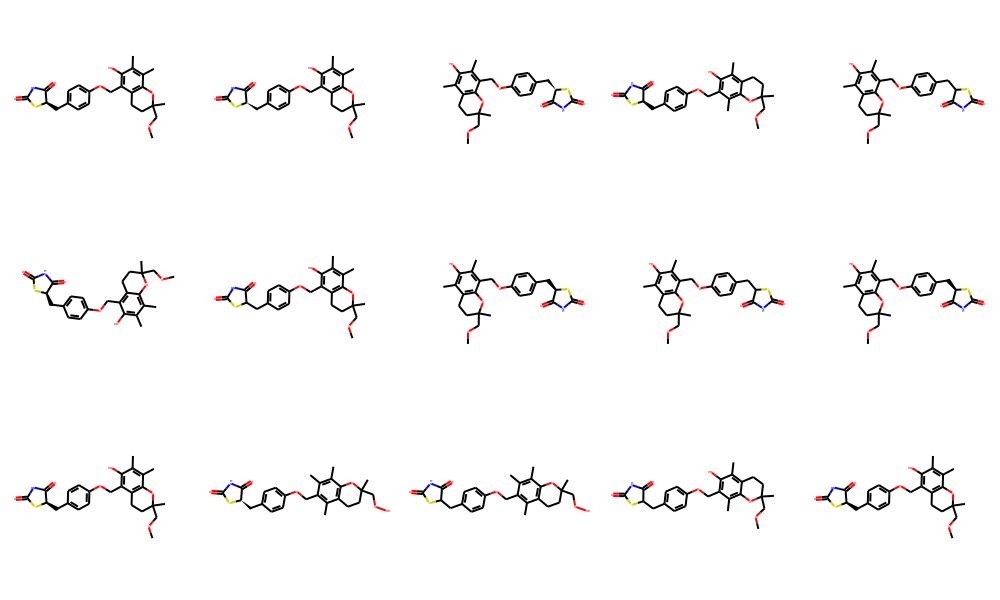

In [23]:
Draw.MolsToGridImage(top_common_score,molsPerRow=5,legends=None,subImgSize=(200,200))

We arbotrarily pick one from the list above, and find the top 5 matches in the initial population. Clearly the end structure derives from 'CC1=C(C)C2=C(CCC(C)(C)O2)C(CC2=NOC(C=CC3=CC=C(O)C(O)=C3)=N2)=C1O'

In [24]:
target = 'CC1=C(C)C2=C(CCC(C)(C[O@]C)O2)C(C-OC2=CC=C(C[C@H]3SC(=O)NC3=O)C=C2)=C1O'
difflib.get_close_matches(target, initial_population,5)

['CC1=NC(C)=C(COC2=CC=C(C=C3SC(=O)NC3=O)C=C2)N=C1C',
 'COC1=CC=C(NC(=O)COC2=CC=C(CC3SC(=S)NC3=O)C=C2OC)C=C1',
 'CC1=C(C)C2=C(CCC(C)(C)O2)C(CC2=NOC(C=CC3=CC=C(O)C(O)=C3)=N2)=C1O',
 'CC1=NC(C(O)COC2=CC=C(C=C3SC(=O)NC3=O)C=C2)=C(C)O1',
 'CC1=CC2=C(C=C1C)N(CCOC1=CC=C(C=C3SC(=O)NC3=O)C=C1)C(C)C(=O)N2']

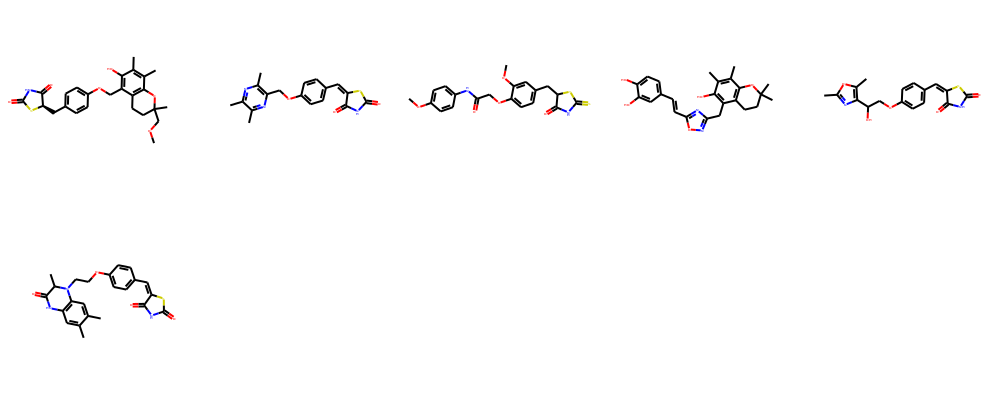

In [25]:
mols = [Chem.MolFromSmiles(target)] + [Chem.MolFromSmiles(x) for x in difflib.get_close_matches(target, initial_population,5)]
Draw.MolsToGridImage(mols,molsPerRow=5,legends=None,subImgSize=(200,200))

31


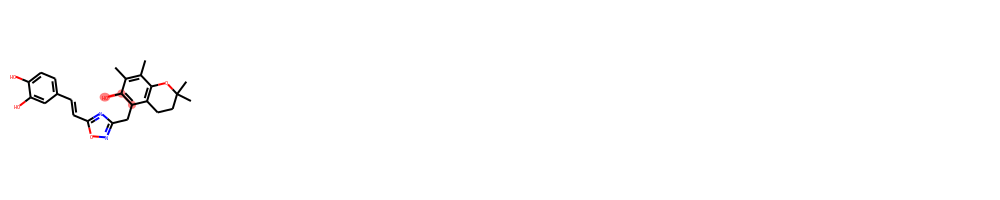

In [26]:
print(mols[3].GetNumAtoms())
# 'CC1=C(C)C2=C(CCC(C)(C)O2)C(CC2=NOC(C=CC3=CC=C(O)C(O)=C3)=N2)=C1O'
#(range(9))
Draw.MolsToGridImage({mols[3]},molsPerRow=5,legends=None,highlightAtomLists=[(12,29,30)],subImgSize=(200,200))

Are there any molecules in the initial population where the main ligand is in the correct position and where the initial atom involves the chromane (which is important for SMILES syntax)

Let's look the molecules with the chromane moiety and mark the first atom.

[<rdkit.Chem.rdchem.Mol object at 0x7fe4dbc01210>, <rdkit.Chem.rdchem.Mol object at 0x7fe4dbc0e300>, <rdkit.Chem.rdchem.Mol object at 0x7fe4d7825b20>, <rdkit.Chem.rdchem.Mol object at 0x7fe4dbc0e6c0>, <rdkit.Chem.rdchem.Mol object at 0x7fe4dbc0e8a0>, <rdkit.Chem.rdchem.Mol object at 0x7fe4dbc0e990>, <rdkit.Chem.rdchem.Mol object at 0x7fe4dbc0e1c0>, <rdkit.Chem.rdchem.Mol object at 0x7fe4dbc0e620>, <rdkit.Chem.rdchem.Mol object at 0x7fe4dbc0e8f0>, <rdkit.Chem.rdchem.Mol object at 0x7fe4dbc0e210>, <rdkit.Chem.rdchem.Mol object at 0x7fe4dbc0e710>, <rdkit.Chem.rdchem.Mol object at 0x7fe4dbc0e670>, <rdkit.Chem.rdchem.Mol object at 0x7fe4dbc0e800>, <rdkit.Chem.rdchem.Mol object at 0x7fe4dbc0e120>, <rdkit.Chem.rdchem.Mol object at 0x7fe4dbc0e530>, <rdkit.Chem.rdchem.Mol object at 0x7fe4dbc0e5d0>, <rdkit.Chem.rdchem.Mol object at 0x7fe4dbc0e9e0>, <rdkit.Chem.rdchem.Mol object at 0x7fe4dbc0e350>, <rdkit.Chem.rdchem.Mol object at 0x7fe4dbc0e7b0>, <rdkit.Chem.rdchem.Mol object at 0x7fe4dbc0e3a0>,

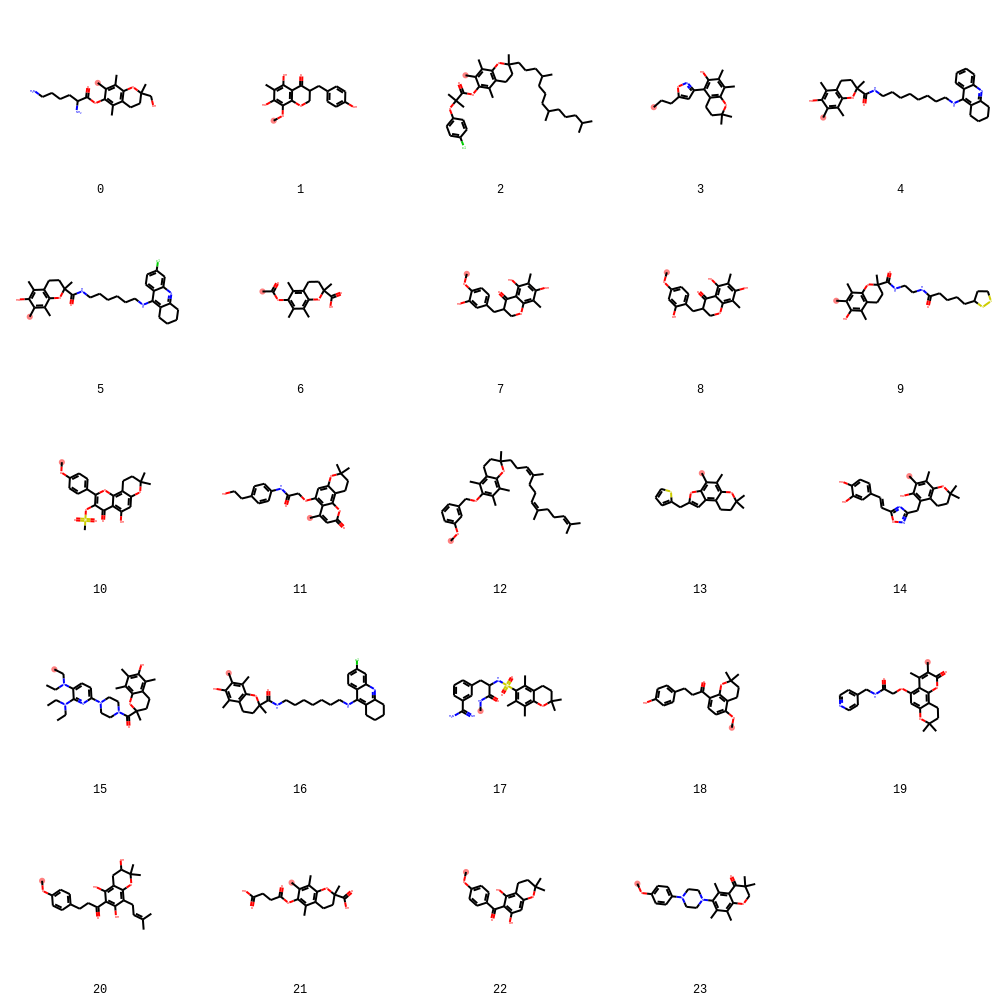

In [27]:
p = Chem.MolFromSmiles('C12=CC=CC=C1OCCC2')
matches = [Chem.MolFromSmiles(x) for x in initial_population if Chem.MolFromSmiles(x).HasSubstructMatch(p)]
matches_smiles = [x for x in initial_population if Chem.MolFromSmiles(x).HasSubstructMatch(p)]
print(matches)
Draw.MolsToGridImage(matches,molsPerRow=5,legends=[str(x) for x in range(len(matches))],highlightAtomLists=25*[(0,)],subImgSize=(200,200))

There are at least 4 promising molecules

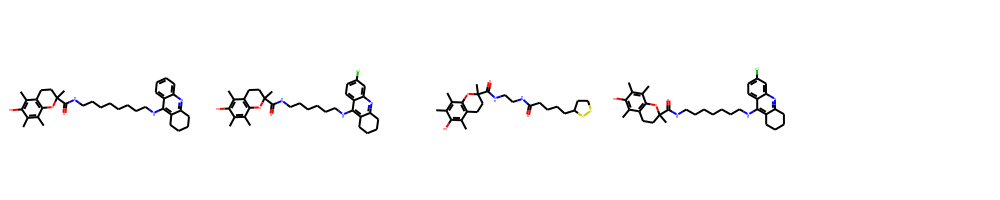

In [28]:
Draw.MolsToGridImage([matches[4],matches[5],matches[9], matches[16]],molsPerRow=5,legends=None,subImgSize=(200,200))

In [29]:
print(matches_smiles[4])
print(matches_smiles[5])
print(matches_smiles[9])
print(matches_smiles[16])

CC1=C(C)C2=C(CCC(C)(C(=O)NCCCCCCCCNC3=C4CCCCC4=NC4=CC=CC=C43)O2)C(C)=C1O
CC1=C(C)C2=C(CCC(C)(C(=O)NCCCCCCNC3=C4CCCCC4=NC4=CC(Cl)=CC=C43)O2)C(C)=C1O
CC1=C(C)C2=C(CCC(C)(C(=O)NCCNC(=O)CCCCC3CCSS3)O2)C(C)=C1O
CC1=C(C)C2=C(CCC(C)(C(=O)NCCCCCCCNC3=C4CCCCC4=NC4=CC(Cl)=CC=C43)O2)C(C)=C1O


Why can't the GA code make troglitazone from these SMILES strings?

'CC1=C(C)C2=C(CCC(C)(C[O@]C)O2)C(C-OC2=CC=C(C[C@H]3SC(=O)NC3=O)C=C2)=C1O'

One possible answer is that these molecule have low fitness and so are not chosen. 

However, the range of probabilites is very small so that is not the explanation.

In [30]:
troglitazone = Chem.MolFromSmiles('O=C1NC(=O)SC1Cc4ccc(OCC3(Oc2c(c(c(O)c(c2CC3)C)C)C)C)cc4')
fp1 = AllChem.GetMorganFingerprint(troglitazone,2)
mols = [Chem.MolFromSmiles(smiles) for smiles in initial_population]
scores = [DataStructs.TanimotoSimilarity(fp1, AllChem.GetMorganFingerprint(mol,2)) for mol in mols]
sum_scores = sum(scores)
prop = [round(x/sum_scores,4) for x in scores]
print(max(prop),min(prop),max(prop)-min(prop))

0.0102 0.0098 0.00040000000000000105


Bottom line: We can't explain why troglitazone can't be rediscovered with SMILES. There 4 SMILES strings in the initial population that seem to have the right syntax.

##Tiotixene smiles analysis

Show the SMILES found for the successful searches

All look very similar to each other, indicating that they derive from common or similar molecule in initial population

In [31]:
for i,x in enumerate(tiotixene_score_list[2*tries:3*tries]):
  if len(x) != 1000: print(i,len(x),x[-1][1])

1 89 CN(C)S(=O)(=O)C1=CC=C2SC3=CC=CC=C3C(=CC\C(N3CCN(C)CC3))C2=C1
17 63 CN(C)S(=O)(=O)C1=CC=C2SC3=CC=[C@H]C=C3C(=C(CCN3CCN(C)CC3))C2=C1
35 83 CN(C)S(=O)(=O)C1=CC=C2SC3=CC=CC=C3C(=[C@H]C\C(N3CCN(C)CC3))C2=C1


In [0]:
initial_population = []
with open('initial_populations/Tiotixene_guacamol.smi','r') as file:
  for smiles in file:
    smiles = smiles.replace('\n', '')
    mol = Chem.MolFromSmiles(smiles)
    Chem.Kekulize(mol, clearAromaticFlags=True)
    smiles = Chem.MolToSmiles(mol, isomericSmiles=False)
    initial_population.append(smiles)

The second string is fairly representative.

Find the 5 most closely related strings to that one in the initial population.

It's clearly coming from this SMILES 

CC(C)N(C(=O)C1=CC=C2C=CC=CC2=C1)C1=CC=CC(N2CCN(C)CC2)=C1

In [33]:
target = 'CN(C)S(=O)(=O)C1=CC=C2SC3=CC=[C@H]C=C3C(=C(CCN3CCN(C)CC3))C2=C1'
print(target, Chem.MolToSmiles(Chem.MolFromSmiles(target)))
difflib.get_close_matches(target, initial_population,5)

CN(C)S(=O)(=O)C1=CC=C2SC3=CC=[C@H]C=C3C(=C(CCN3CCN(C)CC3))C2=C1 CN1CCN(CCC=C2c3ccccc3Sc3ccc(S(=O)(=O)N(C)C)cc32)CC1


['CC(C)N(C(=O)C1=CC=CC2=CC=CC=C21)C1=CC=CC(N2CCN(C)CC2)=C1',
 'COC1=CC=C(C=C2C3=CC=CC=C3C(CCN3CCOCC3)=C2C)C=C1',
 'CN(CC1=CC=CC=C1)C(=O)NC1=CC=C2SC3=CC=CC=C3C(=O)N(C)C2=C1',
 'CC(C)N(C(=O)C1=CC=C2C=CC=CC2=C1)C1=CC=CC(N2CCN(C)CC2)=C1',
 'CCS(=O)(=O)C1=CC=C(OC)C(C2=CC=C(CN3CCC4=CC=CC=C4C3)N2)=C1']

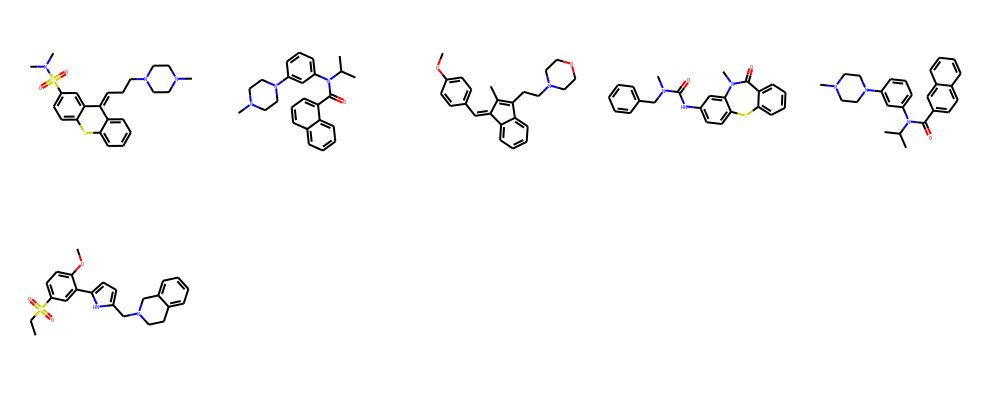

In [34]:
mols = [Chem.MolFromSmiles(target)] + [Chem.MolFromSmiles(x) for x in difflib.get_close_matches(target, initial_population,5)]
Draw.MolsToGridImage(mols,molsPerRow=5,legends=None,subImgSize=(200,200))

Where are the first few and last few atoms?

29


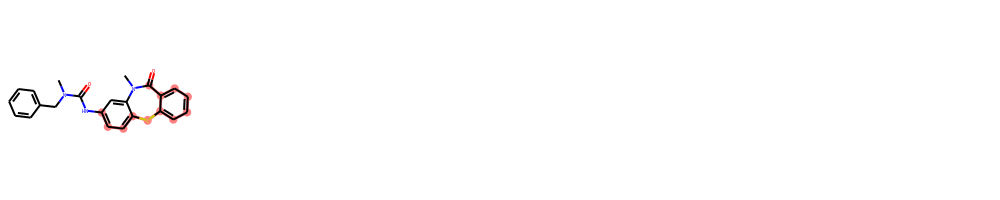

In [35]:
print(mols[3].GetNumAtoms())
#(27,28)
Draw.MolsToGridImage({mols[3]},molsPerRow=5,legends=None,highlightAtomLists=[range(12,24)],subImgSize=(200,200))

How many of these kinds of molecules are there.

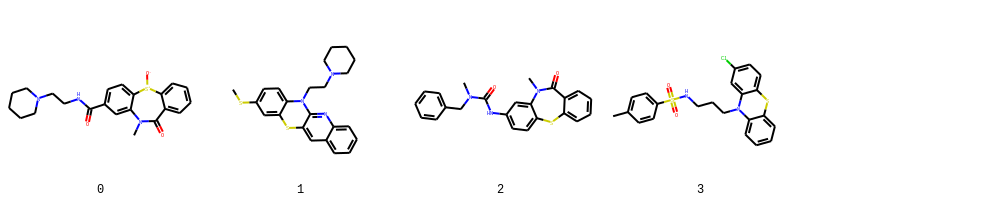

In [36]:
p = Chem.MolFromSmarts('[#6R2]-[#16R1]-[#6R2]')
matches = [Chem.MolFromSmiles(x) for x in initial_population if Chem.MolFromSmiles(x).HasSubstructMatch(p)]
matches_smiles = [x for x in initial_population if Chem.MolFromSmiles(x).HasSubstructMatch(p)]
Draw.MolsToGridImage(matches,molsPerRow=5,legends=[str(x) for x in range(len(matches))],subImgSize=(200,200))

0 and 1 don't have the correct SMILES syntax. Also 3 is difficult because of '..C32)C=C1'. 2 is best but there is only one of them.

In [37]:
matches_smiles

['CN1C(=O)C2=CC=CC=C2[S+]([O-])C2=CC=C(C(=O)NCCN3CCCCC3)C=C21',
 'CSC1=CC=C2C(=C1)SC1=CC3=CC=CC=C3N=C1N2CCN1CCCCC1',
 'CN(CC1=CC=CC=C1)C(=O)NC1=CC=C2SC3=CC=CC=C3C(=O)N(C)C2=C1',
 'CC1=CC=C(S(=O)(=O)NCCCN2C3=CC=CC=C3SC3=CC=C(Cl)C=C32)C=C1']

#Find percentage of 1.6M molecule ChEMBL subset with 0 Tanimoto smilarity

In [49]:
%%bash
cd initial_populations
unzip TanimotoGuacamol.smi.zip
cd ..

Archive:  TanimotoGuacamol.smi.zip
  inflating: TanimotoGuacamol.smi    
   creating: __MACOSX/
  inflating: __MACOSX/._TanimotoGuacamol.smi  


In [0]:
df = pd.read_csv('initial_populations/TanimotoGuacamol.smi', sep=" ")

In [51]:
print(100*df.loc[df['Celecoxib'] == 0].shape[0]/df.shape[0])
print(100*df.loc[df['Troglitazone'] == 0].shape[0]/df.shape[0])
print(100*df.loc[df['Tiotixene'] == 0].shape[0]/df.shape[0])

0.07295563970345198
0.008483213919006043
0.01231636983796433
